### Importing libraries

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import math
import random
import collections, numpy
from matplotlib.pyplot import pie, axis, show

### Reading the dataset

In [2]:
folder= "local/"
inputFile=folder+ "CV_1e5TeV_base_SMALL"

cols=["PDGcode", "KinE", "PX","PY","PZ","Weight","PosX","PosY","PosZ", "Time","PosXmu","PosYmu","PosZmu","EneEle","CX","CY","CZ", "PosXFI", "PosYFI", "PosZFI"]
dataset = pd.read_csv(inputFile,header=None,names=cols, delim_whitespace=True)

listChargedHadrons=[321, 311, 211, 2212, 3122, 3112, -321, -311, -211, -2212, -3122, -3112]

In [3]:
#timeOffset=3600.
#dataset["Time"]=dataset["Time"]+timeOffset

dataset=dataset[dataset["PosZmu"]<2500.] #in cm

enCutPh=0.2e-3
enCutNeu=0.1e-3
enCutElPos=0.2e-3
enCutChHad=1e-3
enCutMu=1e-3

flagApplyPaperEnCut=True

if flagApplyPaperEnCut:
    dataset=dataset.drop(dataset[(dataset["PDGcode"] == 22) & (dataset["KinE"] < enCutPh)].index)
    dataset=dataset.drop(dataset[((dataset["PDGcode"]==11)|(dataset["PDGcode"]==-11)) & (dataset["KinE"] < enCutElPos)].index)
    dataset=dataset.drop(dataset[((dataset["PDGcode"]).isin(listChargedHadrons)) & (dataset["KinE"] < enCutChHad)].index)
    dataset=dataset.drop(dataset[((dataset["PDGcode"]==13)|(dataset["PDGcode"]==-13)) & (dataset["KinE"] < enCutMu)].index)
    dataset=dataset.drop(dataset[(dataset["PDGcode"] == 2112) & (dataset["KinE"] < enCutNeu)].index)

In [4]:
n_ph= sum(dataset[dataset["PDGcode"]==22]["Weight"])
n_pos= sum(dataset[dataset["PDGcode"]==-11]["Weight"])
n_el=sum(dataset[dataset["PDGcode"]==11]["Weight"])
n_chhadr= sum(dataset[(dataset["PDGcode"]).isin(listChargedHadrons)]["Weight"])
n_neu= sum(dataset[dataset["PDGcode"]==2112]["Weight"])
n_mum= sum(dataset[dataset["PDGcode"]==13]["Weight"])
n_mup= sum(dataset[dataset["PDGcode"]==-13]["Weight"])
n_elpos=n_el+n_pos
n_mu=n_mup+n_mum

#specifiche istogrammi
nbins=200
binwidth=0.8

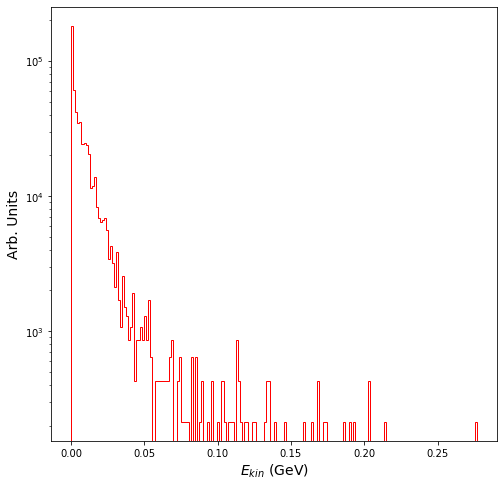

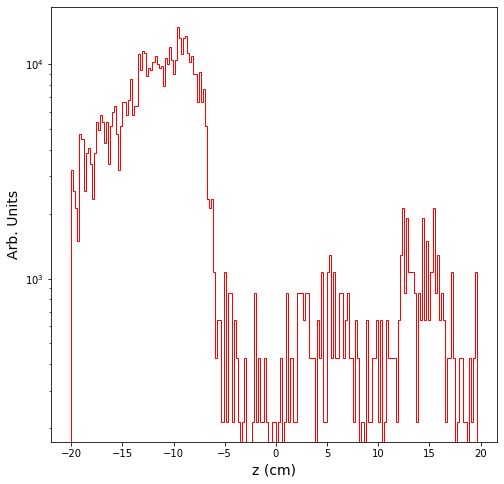

In [11]:
datasetEP=dataset[((dataset["PDGcode"]==11)|(dataset["PDGcode"]==-11)) & (dataset["PosZ"] > -20) & (dataset["PosZ"] < 20)]

fig=plt.figure(figsize=(8,8))
plt.hist(datasetEP["KinE"],log=True,weights=datasetEP["Weight"],histtype='step',bins=nbins,rwidth=binwidth,color='r')
plt.xlabel('$E_{kin}$ (GeV)',fontsize=14)
plt.ylabel('Arb. Units',fontsize=14)
figname="plot_prova/Energy_ep"
plt.show()
plt.savefig(figname,transparent=False, facecolor='white')
plt.close()

fig=plt.figure(figsize=(8,8))
plt.hist(datasetEP["PosZ"],log=True,weights=datasetEP["Weight"],histtype='step',bins=nbins,rwidth=binwidth,color='r')
plt.xlabel('z (cm)',fontsize=14)
plt.ylabel('Arb. Units',fontsize=14)
figname="plot_prova/z_ep"
plt.show()
plt.savefig(figname,transparent=False, facecolor='white')
plt.close()


In [6]:
dataset

,PDGcode,KinE,PX,PY,PZ,Weight,PosX,PosY,PosZ,Time,PosXmu,PosYmu,PosZmu,EneEle,CX,CY,CZ,PosXFI,PosYFI,PosZFI
1,2112,0.000350,-0.012496,0.012505,0.018592,213.888,-0.267,36.252,319.747,53.558400,0.287,0.184,1354.770,237.8414,-0.000039,-0.000038,-1.0,-0.559,-0.938,367.594
3,2112,0.000147,0.013262,0.007452,0.006677,213.888,37.584,9.694,349.970,122.027000,0.287,0.184,1354.770,237.8414,-0.000039,-0.000038,-1.0,-0.559,-0.938,367.594
5,22,0.000481,0.000194,-0.000304,-0.000318,213.888,-16.854,-31.887,317.552,659.873000,0.287,0.184,1354.770,237.8414,-0.000039,-0.000038,-1.0,-0.559,-0.938,367.594
9,22,0.001744,0.000717,0.000899,-0.001312,213.888,2.216,2.942,20.887,-0.709701,0.031,0.039,1556.655,291.2626,0.000115,0.000033,-1.0,-0.307,-0.171,117.153
10,22,0.000746,-0.000703,0.000170,0.000184,213.888,-2.585,-0.499,-14.863,0.487163,0.031,0.039,1556.655,291.2626,0.000115,0.000033,-1.0,-0.307,-0.171,117.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727214,2112,0.000144,-0.013216,-0.008101,-0.005524,213.888,-21.194,-13.372,187.649,118.151000,-0.020,0.186,1665.519,317.6749,0.000152,0.000062,-1.0,0.143,-0.770,263.238
727216,2112,0.000143,-0.013090,-0.004876,-0.008598,213.888,-20.915,-21.463,245.571,38.690800,-0.020,0.186,1665.519,317.6749,0.000152,0.000062,-1.0,0.143,-0.770,263.238
727217,2112,0.000190,-0.017792,-0.003919,-0.005031,213.888,-31.203,-9.847,278.053,83.993700,-0.020,0.186,1665.519,317.6749,0.000152,0.000062,-1.0,0.143,-0.770,263.238
727223,22,0.000258,0.000128,-0.000146,0.000170,213.888,30.617,-6.385,261.006,164.610000,-0.020,0.186,1665.519,317.6749,0.000152,0.000062,-1.0,0.143,-0.770,263.238


In [7]:
#datasetEP.groupby("Elem").count()

In [8]:
#datasetEP.groupby("Elem2").count()

In [9]:
#datasetEP[datasetEP["Elem2"] == "Nozzl2WR"].groupby("Elem").count()

In [10]:
#datasetEP[datasetEP["Elem2"] == "Nozzl1WR"].groupby("Elem").count()